In [1]:
%run Global.ipynb
%run Helper_Functions.ipynb

In [2]:
train_df_ohe_selected = pd.read_csv(DATASET_DIR + "/train_df_ohe_selected_50.csv", keep_default_na=False)

y = train_df_ohe_selected.iloc[:,-1]
X = train_df_ohe_selected.iloc[:,:-1]

# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='sag') # uses Stochastic Average Gradient descent solver

In [4]:
param_grid = {'max_iter': [100, 500, 1000, 5000, 10000]}
cv_results = tune_hyperparameter(logr, param_grid, X, y, cv=3)
cv_results
# max_iter>=500 works well

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .......................................max_iter=100; total time=  11.7s
[CV] END .......................................max_iter=100; total time=  11.9s
[CV] END .......................................max_iter=100; total time=  11.0s
[CV] END .......................................max_iter=500; total time=  26.0s
[CV] END .......................................max_iter=500; total time=  27.9s
[CV] END .......................................max_iter=500; total time=  29.6s
[CV] END ......................................max_iter=1000; total time=  27.8s
[CV] END ......................................max_iter=1000; total time=  28.1s
[CV] END ......................................max_iter=1000; total time=  29.0s
[CV] END ......................................max_iter=5000; total time=  27.0s
[CV] END ......................................max_iter=5000; total time=  27.1s
[CV] END ......................................ma

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'max_iter': 100},0.709700,0.014423,5,0.150069,0.002879,5,0.247750,0.004796,5,...,1,0.070631,0.007089,5,0.129498,0.011707,5,0.728093,0.001383,5
1,{'max_iter': 500},0.715484,0.013999,1,0.154844,0.003828,1,0.254586,0.006002,1,...,2,0.074668,0.010270,1,0.136212,0.017417,1,0.729437,0.001567,1
2,{'max_iter': 1000},0.715484,0.013999,1,0.154844,0.003828,1,0.254586,0.006002,1,...,2,0.074668,0.010270,1,0.136212,0.017417,1,0.729437,0.001567,1
3,{'max_iter': 5000},0.715484,0.013999,1,0.154844,0.003828,1,0.254586,0.006002,1,...,2,0.074668,0.010270,1,0.136212,0.017417,1,0.729437,0.001567,1
4,{'max_iter': 10000},0.715484,0.013999,1,0.154844,0.003828,1,0.254586,0.006002,1,...,2,0.074668,0.010270,1,0.136212,0.017417,1,0.729437,0.001567,1


LogisticRegression prediction took 362.12949299812317 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.289617           0.838675           0.112150       0.734720
1           0.260749           0.835624           0.165138       0.729952
2           0.285326           0.835456           0.127273       0.730819
3           0.267586           0.835940           0.175439       0.730269
4           0.308743           0.840933           0.111111       0.739376
5           0.241234           0.833201           0.189655       0.725499
6           0.251412           0.836143           0.148148       0.730269
7           0.277008           0.837259           0.126126       0.732437
8           0.299728           0.838812           0.113208       0.736340
9           0.269972           0.837000           0.176991       0.731570


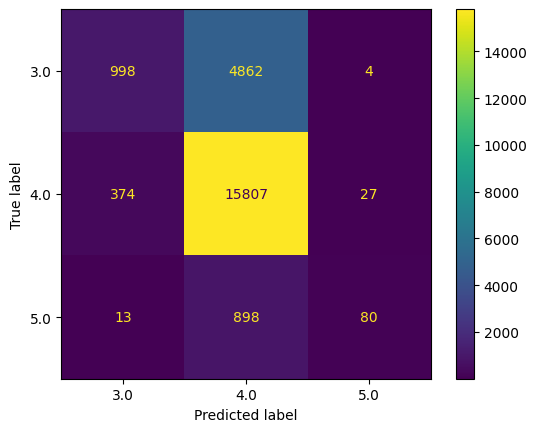

test_3.0_f1-score    0.275138
test_4.0_f1-score    0.836904
test_5.0_f1-score    0.144524
test_accuracy        0.732125
dtype: float64

In [5]:
logr = LogisticRegression(solver='sag', max_iter=500)
logr.fit(X, y)
cross_val_report(logr, X, y)[1]

## Attempt 2: Using selected features

In [6]:
selector = SelectFromModel(logr, prefit=True).fit(X, y)
print("LogR Coefficients:", selector.estimator_.coef_)
print("Selector threshold:", selector.threshold_)
selected_features = [X.columns[i] for i in range(X.shape[1]) if selector.get_support()[i]]
print(len(selected_features), "features selected")
X_filtered = X[selected_features]

LogR Coefficients: [[ 0.15637202 -0.00109718  0.0096929  ... -0.96924598 -0.02458321
  -0.42227948]
 [-0.08624537 -0.00629142  0.00153767 ...  0.49809241 -0.3041469
  -0.28169694]
 [-0.07012665  0.0073886  -0.01123057 ...  0.47115357  0.32873011
   0.70397642]]
Selector threshold: 1.7678928122459392
288 features selected


LogisticRegression prediction took 22.691722869873047 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.221239           0.836905           0.109091       0.729085
1           0.204082           0.833333           0.196429       0.724317
2           0.216617           0.838205           0.092593       0.729952
3           0.174436           0.832898           0.188034       0.721596
4           0.239291           0.840921           0.159292       0.735906
5           0.188623           0.835119           0.222222       0.725932
6           0.178187           0.837536           0.210526       0.728968
7           0.208644           0.836905           0.173913       0.728968
8           0.245974           0.840398           0.112150       0.735473
9           0.189474           0.834724           0.144144       0.725065


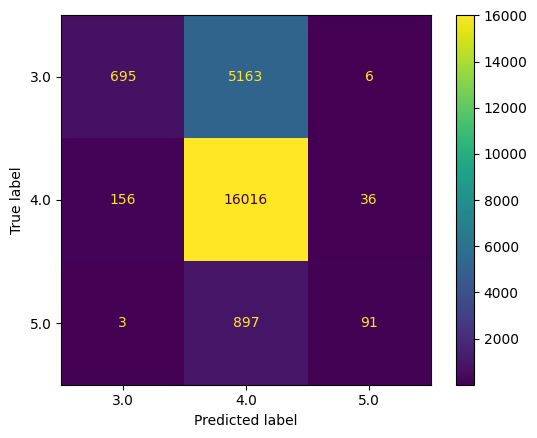

test_3.0_f1-score    0.206657
test_4.0_f1-score    0.836694
test_5.0_f1-score    0.160839
test_accuracy        0.728526
dtype: float64

In [7]:
logr.fit(X_filtered, y)
cross_val_report(logr, X_filtered, y)[1]

## Attempt 3: Applying Dimensionality Reduction

In [8]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=100, random_state=30027)
X_reduced = reducer.fit_transform(X_filtered)
X_reduced

array([[-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04],
       [-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04],
       [-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04],
       ...,
       [-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04],
       [-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04],
       [-9.87326868e-03, -9.15325284e-03, -6.84363169e-03, ...,
        -5.31308980e-04, -9.71324268e-05, -2.58839025e-04]])

LogisticRegression prediction took 8.239176988601685 seconds
   test_3.0_f1-score  test_4.0_f1-score  test_5.0_f1-score  test_accuracy
0           0.135802           0.829534           0.056604       0.714348
1           0.107858           0.825636           0.162162       0.708713
2           0.106918           0.828941           0.092593       0.712180
3           0.100000           0.825783           0.110092       0.708153
4           0.125786           0.831954           0.111111       0.717693
5           0.119816           0.827747           0.178571       0.712056
6           0.111111           0.832000           0.149533       0.717693
7           0.115445           0.828801           0.109091       0.712489
8           0.128125           0.830403           0.057692       0.715525
9           0.120930           0.828320           0.108108       0.712056


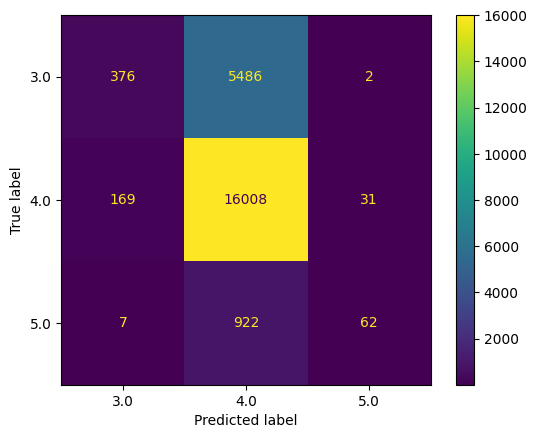

test_3.0_f1-score    0.117179
test_4.0_f1-score    0.828912
test_5.0_f1-score    0.113556
test_accuracy        0.713090
dtype: float64

In [9]:
logr.fit(X_reduced, y)
cross_val_report(logr, X_reduced, y)[1]

In [10]:
# Dimensionality reduction doesn't work well - Let's retain the original features